## Simple Linear Regression
Simple Linear Regression helps to find the linear relationship between two continuous variables. It uses one independent variable to predict a dependent variable by fitting a best linear relationship.

In [72]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#Reading the dataset
df = pd.read_csv('D:\\5.1_Machine_Learning_Code\\Regression\\Advertising.csv')

In [74]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [75]:
df.shape

(200, 4)

In [76]:
#Setting the value for X and Y
x = df[['TV']]
#x = dataset[['TV','Radio','Newspape']]
y = df['Sales']

In [77]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 50)

In [78]:
x_train.shape

(160, 1)

In [79]:
x_train.head(2)

,TV
170,50.0
183,287.6


In [80]:
x_test.shape

(40, 1)

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)

LinearRegression()

In [101]:
model.intercept_

6.845633135106894

In [103]:
model.coef_

array([0.04992806])

In [105]:
#Intercept and Coefficient
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  6.845633135106894
Coefficient:  [0.04992806]


In [109]:
#Prediction of test set
y_pred= model.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [15.61799312 18.55376299  8.03392094 13.30632398 11.64871242 17.74992124
 18.43393565  7.27501444 18.22923061 11.25428075 18.81838171 15.68289959
 17.67003635 15.45822333 19.97171987 13.59590672 12.88692829 18.24420903
  8.99253968 13.42115852 12.32773402 10.60521598  9.95615122 17.94963348
 20.51094291 10.26071238 11.35912968 11.62374839 16.07733126 17.17075576
 12.99177721 14.32485639  7.68941733 16.71141761 10.66013685  9.07741738
 11.9732448  19.96173426 11.19935989 10.66013685]


In [111]:
#Actual value and the predicted value
model_difference = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
model_difference.head()

,Actual value,Predicted value
112,14.1,15.617993
165,11.9,18.553763
12,9.2,8.033921
73,11.0,13.306324
144,11.4,11.648712


In [113]:
model_difference['Error'] = model_difference['Actual value'] - model_difference['Predicted value']

In [115]:
model_difference['Error']

112   -1.517993
165   -6.653763
12     1.166079
73    -2.306324
144   -0.248712
20     0.250079
199   -5.033936
8     -2.475014
39     3.270769
88     1.645719
81    -6.518382
197   -2.882900
69     4.629964
160   -1.058223
25    -7.971720
99     3.604093
151   -1.286928
23    -2.744209
138    0.607460
159   -0.521159
89     4.372266
82     0.694784
24    -0.256151
174   -6.449633
137    0.289057
83     3.339288
107   -2.659130
34    -2.123748
97    -0.577331
167   -4.970756
123    2.208223
157   -4.224856
75     1.010583
152   -0.111418
117   -1.260137
149    1.022583
63     2.026755
54     0.238266
125   -0.599360
80     1.139863
Name: Error, dtype: float64

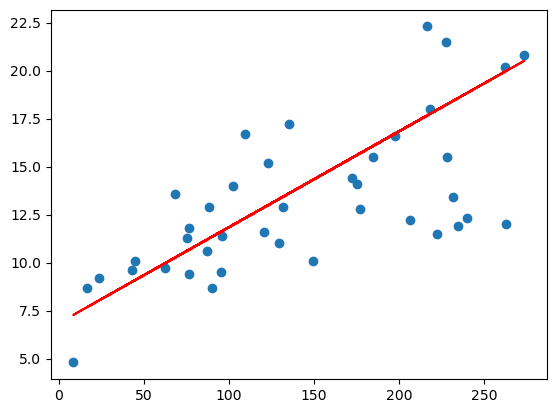

In [119]:
#Line of best fit
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred, 'Red')
plt.show()

In [127]:
#Model Evaluation
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(x,y)*100))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

R squared: 60.93
Mean Absolute Error: 2.399190350812068
Mean Square Error: 9.982774399876993
Root Mean Square Error: 3.15955287974058
